## **8장. 데이터 전처리**

In [16]:
#결측치 : 데이터 수집 과정에서 값이 기록되지 않은 것. 넘파이에서는 np.nan로 표현, 판다스에선 NaN(Not a Number)

import pandas as pd
import numpy as np

df = pd.DataFrame({'A' : [1,2,np.nan, 4,5], \
                   'B' : [6,7,8,np.nan, 10],\
                   'C' : [11,12,13,np.nan, np.nan]})
df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


In [17]:
pd.isna(df) #결측치는 True로 표시됨.

,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,True
4,False,False,True


In [18]:
#열별 결측치 개수 확인
pd.isna(df).sum() #True의 개수를 센다.

A    1
B    1
C    2
dtype: int64

In [19]:
#행별로 모든 결측치 제거
#dropna() : 결측치가 하나라도 있는 행을 모두 제거함.
#dropna() 함수는 결측치를 모두 제거해도 괜찮을 정도로 전체 행이 많거나 결측치 수가 적은 경우에 사용하는 것이 좋음.
df_drop_nan = df.dropna()
df_drop_nan

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


In [20]:
#특정 열의 결측치 제거
#B열과 C열의 연관성이나 유형별 평균 등 두 변수의 관계가 중요한 분석을 수행하는 경우
df_drop_B_C = df.dropna(subset=['B','C'])
df_drop_B_C

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0


In [21]:
#결측치 대체
df_0 = df['C'].fillna(0) #C열에 있는 결측치를 모두 0으로 대체
print(df_0)

0    11.0
1    12.0
2    13.0
3     0.0
4     0.0
Name: C, dtype: float64


In [22]:
df_missing = df['A'].fillna('missing')
df_missing

0        1.0
1        2.0
2    missing
3        4.0
4        5.0
Name: A, dtype: object

In [23]:
#평균으로 결측치 대체
df_mean = df.fillna(df.mean()) #사본
#df.fillna(df.mean(), inplace = True)-> 원본에 적용
print(df, '\n')
print(df_mean)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A      B     C
0  1.0   6.00  11.0
1  2.0   7.00  12.0
2  3.0   8.00  13.0
3  4.0   7.75  12.0
4  5.0  10.00  12.0


In [24]:
#주변 데이터로 결측치 대체

print(df, '\n')

#결측치 바로 위의 값으로 대체하기
df_ffill = df.fillna(method = 'ffill')

print(df_ffill, '\n')
#결측치 바로 아래의 값으로 대체하기
df_bfill = df.fillna(method = 'bfill')
print(df_bfill)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  2.0   8.0  13.0
3  4.0   8.0  13.0
4  5.0  10.0  13.0 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  4.0   8.0  13.0
3  4.0  10.0   NaN
4  5.0  10.0   NaN


In [25]:
#각 열을 서로 다른 값으로 대체
#대체할 값을 딕셔너리로 정의함
fill_dict = {'A': df['A'].mean(), 'B' : '12/25', 'C' : 'missing'}
df_filled = df.fillna(value=fill_dict)
df_filled

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,12/25,missing
4,5.0,10.0,missing


In [26]:
#이상치(Outlier) : 데이터셋에서 대부분의 데이터가 모인 범위를 크게 벗어난 값
#이상치 유형 : 일변량, 다변량
# - 일변량 이상치 : 데이터 열 하나, 즉 단일 변수에 발생한 이상치
# - 다변량 이상치 : 열이 2개 이상인 데이터의 이상치

#이상치를 식별할 때 일반적으로 데이터의 분포를 시각화함.
#이상치 제거 기법 : IQR(Interquartile range), Z점수와 같은 통계 기법을 사용
# - IQR(Interquartile range) : 제1사분위수에서 제3사분위수까지의 거리.
#                              중앙값과 IQR을 계산하고, IQR의 1.5배보다 멀리 떨어진 데이터를 이상치로 간주하여 제거.
# 데이터 시각화 이용 : 데이터 정리, 데이터 탐색, 추세 및 클러스터 식별 등에 유용, 상자그래프, 산점도, 히스토그램, 분포도, QQ플롯 등의 그래프 활용함

In [27]:
#표준화와 정규화
#특성 스케일링(Feature scaling), 데이터 스케일링(Data scaling) -> 값의 범위를 조정

#표준화(Standardization) : 데이터의 분포를 평균이 0이고 표준편차가 1이 되게 변환하는 데이터 전처리 기법
#Z 점수(Z-score) : 표준화 점수, 표준 점수어떤 값이 평균에서 얼마나 떨어져 있는지를 나타내는 수
# - 정규분포곡선에서 Z 점수의 절댔값이 3 이하인 데이터가 전체의 99.7% -> 어떤 데이터의 Z점수가 3보다 크다면, 이상치로 간주

#정규화(Normalization) : 데이터를 특정 범위 내의 값으로 조정하는 데이터 전처리 기법
# - 대표적인 정규화 방법 : 최소-최대 정규화(Min-Max scaling) : 데이터의 최솟값과 최댓값을 사용하여 데이터를 0과 1 사이의 값으로 변환


In [28]:
#지하수 데이터 수집
#국가지하수정보센터 : https://www.gims.go.kr/

In [29]:
import os #path를 지정할 때 사용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings #경고 관련 라이브러리
from datetime import datetime, date, time #날짜와 시간 데이터를 다루는 데 사용할 모듈

warnings.filterwarnings('ignore') #경고 메세지를 제거
#엑셀 파일을 읽어올 때 엑셀 데이터에 글꼴, 정렬, 테두리 등 기본 스타일이 지정되어 있지 않으면
#경고 메시지를 출력할 수 있기 때문에 사용함

In [30]:
#파일명 확인
path = './대전태평(암반)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
file_list_py

['대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx']

In [31]:
#데이터프레임 하나로 병합
df = pd.DataFrame()
for i in file_list_py:
  data = pd.read_excel(path + i)
  df = pd.concat([df, data])
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20100101,0,16.2,44.47,741
1,대전태평,(암반),20100101,1,16.2,44.47,741
2,대전태평,(암반),20100101,2,16.2,44.47,741
3,대전태평,(암반),20100101,3,16.2,44.47,741
4,대전태평,(암반),20100101,4,16.2,44.48,741
...,...,...,...,...,...,...,...
8498,대전태평,(암반),20121231,4,16.4,44.30,741
8499,대전태평,(암반),20121231,3,16.4,44.30,741
8500,대전태평,(암반),20121231,2,16.4,44.30,741
8501,대전태평,(암반),20121231,1,16.4,44.30,741


In [32]:
#행 인덱스 재설정
df = df.reset_index(drop= True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20100101,0,16.2,44.47,741
1,대전태평,(암반),20100101,1,16.2,44.47,741
2,대전태평,(암반),20100101,2,16.2,44.47,741
3,대전태평,(암반),20100101,3,16.2,44.47,741
4,대전태평,(암반),20100101,4,16.2,44.48,741
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20121231,4,16.4,44.30,741
69544,대전태평,(암반),20121231,3,16.4,44.30,741
69545,대전태평,(암반),20121231,2,16.4,44.30,741
69546,대전태평,(암반),20121231,1,16.4,44.30,741


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [34]:
#인덱스 지정
#to_datetime()함수로 날짜 열과 시간 열을 합침. Date 열을 새로 생성하고 합친 시간 데이터를 할당
df['Date'] = pd.to_datetime(df['날짜'], format='%Y%m%d') +\
             pd.to_timedelta(df['시간'].astype(int), unit='h')
df.set_index(df['Date'], inplace = True)
df.head(6)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2010-01-01 00:00:00,대전태평,(암반),20100101,0,16.2,44.47,741,2010-01-01 00:00:00
2010-01-01 01:00:00,대전태평,(암반),20100101,1,16.2,44.47,741,2010-01-01 01:00:00
2010-01-01 02:00:00,대전태평,(암반),20100101,2,16.2,44.47,741,2010-01-01 02:00:00
2010-01-01 03:00:00,대전태평,(암반),20100101,3,16.2,44.47,741,2010-01-01 03:00:00
2010-01-01 04:00:00,대전태평,(암반),20100101,4,16.2,44.48,741,2010-01-01 04:00:00
2010-01-01 05:00:00,대전태평,(암반),20100101,5,16.2,44.48,741,2010-01-01 05:00:00


In [35]:
#EC : 전기전도도, 수질이 좋을수록 물에 녹아 있는 물질이 적어 전기전도도도 낮음

#분석할 속성만 조회하여 저장
df1 = df[['수온(℃)', '수위(el.m)', 'EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head()

,temp,level,EC
Date,,,
2010-01-01 00:00:00,16.2,44.47,741
2010-01-01 01:00:00,16.2,44.47,741
2010-01-01 02:00:00,16.2,44.47,741
2010-01-01 03:00:00,16.2,44.47,741
2010-01-01 04:00:00,16.2,44.48,741


In [36]:
#결측치 수 확인
df1.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [37]:
#csv 파일 저장
df1.to_csv('./대전지하수.csv', encoding='cp949')

In [38]:
#통계량으로 이상치 확인
df = pd.read_csv('./대전지하수.csv', index_col = 'Date', parse_dates=True, encoding='cp949')
df.describe()
#level열과 EC열에서 최솟값과 1사분위수의 차이가 큼 -> 최솟값이 이상치일 가능성이 높음.

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


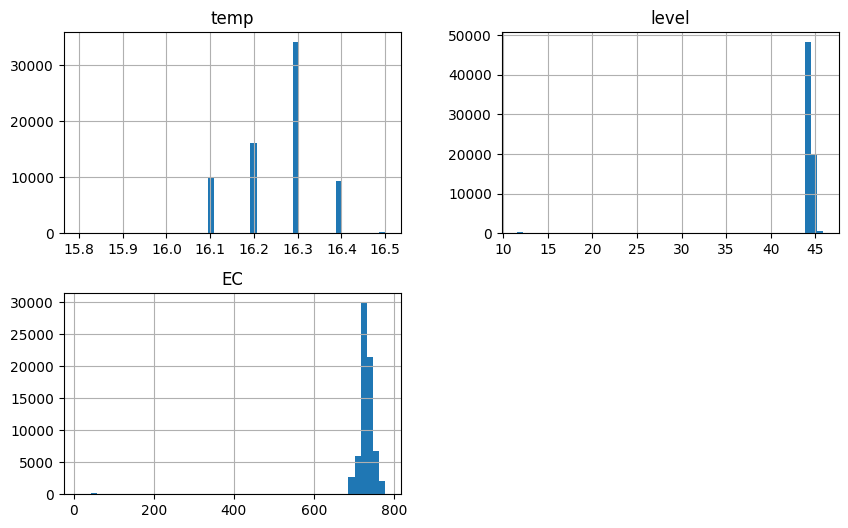

In [39]:
#히스토그램으로 데이터의 분포 확인하여 이상치 확인
df.hist(bins = 50, figsize=(10,6))
plt.show()

<Axes: >

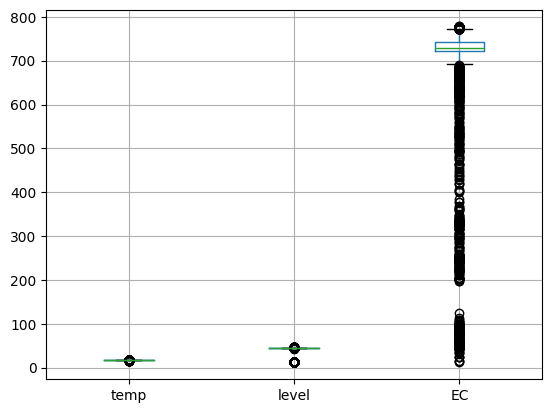

In [40]:
#상자 그래프로 이상치 확인
df.boxplot()
#한꺼번에 세 열의 상자 그래프를 그렸더니 EC 데이터가 다른 열에 비해 값이 커서 temp와 level의
#이상치 유무를 확인하기 어려움.

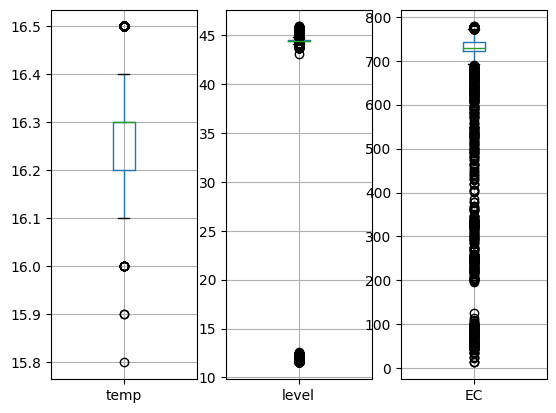

In [41]:
#다중 상자 그래프로 이상치 확인
plt.subplot(1,3,1)
df.boxplot(column='temp', return_type='both')
plt.subplot(1,3,2)
df.boxplot(column='level', return_type='both')
plt.subplot(1,3,3)
df.boxplot(column='EC', return_type='both')
plt.show()

# 지하수온 그래프 -> 상자 수염 위아래의 이상치 확인
# 지하수위 그래프 -> 지하수위가 낮은 영역에서 이상치 나타남
# 지하수 전도도 -> 전도도가 낮은 영역에서 이상치 확잉ㄴ

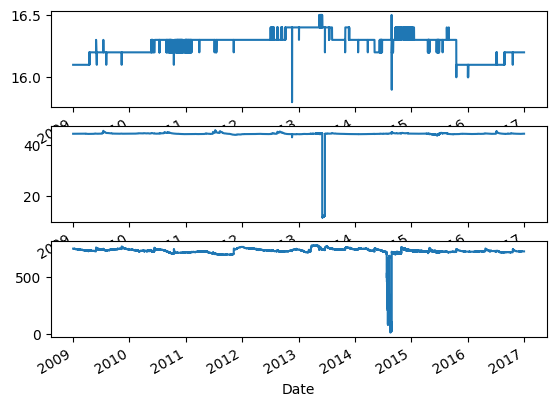

In [42]:
#다중 시계열 그래프
plt.subplot(3,1,1)
df['temp'].plot()
plt.subplot(3,1,2)
df['level'].plot()
plt.subplot(3,1,3)
df['EC'].plot()
plt.show()

In [43]:
#IQR을 이용하는 이상치 확인
#- 상한값 : 3사분위수 + IQR * 1.5
#- 하한값 : 1사분위수 - IQR * 1.5
#이상치는 하한값과 상한값을 벗어나는 영역의 데이터

#지하수위 IQR
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)

0.17999999999999972


In [44]:
#지하수위의 상하한값과 이상치 개수
upper_level = q3_level + 1.5*iqr_level
lower_level = q1_level - 1.5*iqr_level
print(upper_level, '/', lower_level)
print((df['level'] > upper_level).sum())
print((df['level'] < lower_level).sum())

44.81999999999999 / 44.099999999999994
4492
1273


<Axes: xlabel='Date'>

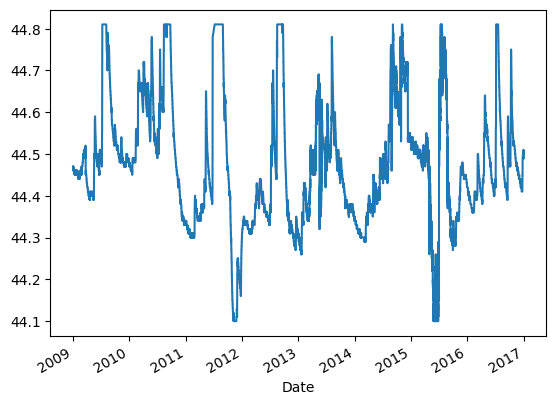

In [45]:
#이상치를 제거한 지하수위
df_iqr_level = df[(df['level'] < upper_level) & ( df['level'] > lower_level)]
df_iqr_level['level'].plot()

In [46]:
#지하수온 IQR과 이상치 개수

#사분위수와 IQR 구하기
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)
iqr_temp = q3_temp - q1_temp
print('IQR: ', iqr_temp)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp - iqr_temp * 1.5
print(upper_temp, '/', lower_temp)
print((df['temp'] > upper_temp).sum()) #상한값을 벗어나는 이상치 개수 확인
print((df['temp'] < lower_temp).sum()) #하한값을 벗어나는 이상치 개수 확인
#이상치 개수가 매우 적어 연중 지하수온의 변화가 거의 없음

IQR:  0.10000000000000142
16.450000000000003 / 16.049999999999997
227
15


In [48]:
#전기전도도 IQR과 이상치 개수

q3_EC = df['EC'].quantile(q = 0.75)
q1_EC = df['EC'].quantile(q = 0.25)
iqr_EC = q3_EC - q1_EC
print('IQR: ', iqr_EC)

upper_EC = q3_EC + iqr_EC * 1.5
lower_EC = q1_EC - iqr_EC * 1.5
print(upper_EC, '/', lower_EC)
print((df['EC'] > upper_EC).sum())
print((df['EC'] < lower_EC).sum())

IQR:  20.0
772.0 / 692.0
831
788


In [49]:
#이상치를 한꺼번에 제거
#특성 수가 여러 개일떄는 이상치를 한꺼번에 제거해야 데이터 손실을 막을 수 있음.

df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp) &\
            (df['level'] < upper_level) & (df['level'] > lower_level) &\
            (df['EC'] < upper_EC) & (df['EC'] > lower_EC)]

In [50]:
df_iqr.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


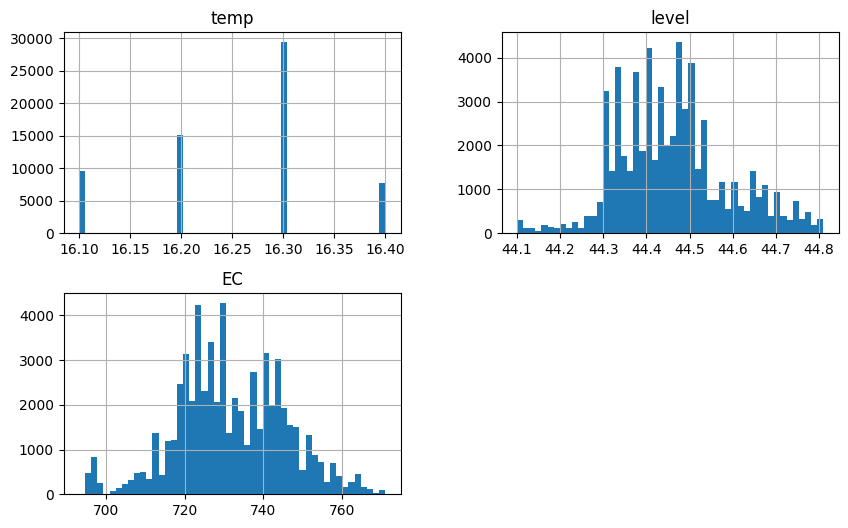

In [51]:
#이상치 제거 후 히스토그램
df_iqr.hist(bins = 50, figsize=(10,6))
plt.show()

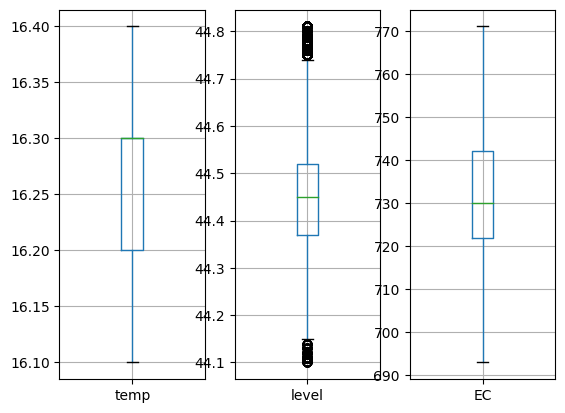

In [52]:
#이상치 제거 후 상자 그래프
plt.subplot(1,3,1)
df_iqr.boxplot(column='temp', return_type = 'both')
plt.subplot(1,3,2)
df_iqr.boxplot(column='level', return_type = 'both')
plt.subplot(1,3,3)
df_iqr.boxplot(column='EC', return_type = 'both')
plt.show()

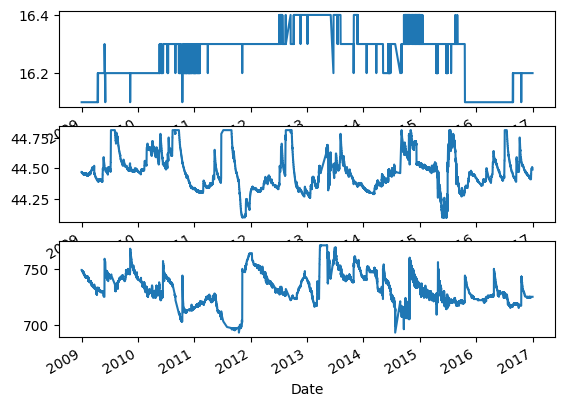

In [54]:
#이상치 제거 후 시계열 그래프
plt.subplot(3,1,1)
df_iqr['temp'].plot()
plt.subplot(3,1,2)
df_iqr['level'].plot()
plt.subplot(3,1,3)
df_iqr['EC'].plot()
plt.show()

In [55]:
#정제된 데이터를 csv로 저장
df_iqr.to_csv('대전지하수_정제.csv', encoding = 'cp949')

In [66]:
#표준화와 정규화

#정제된 데이터 파일을 불러와 열별로 데이터 범위 확인
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./대전지하수_정제.csv')
df.head()

,Date,temp,level,EC
0,2010-01-01 00:00:00,16.2,44.47,741
1,2010-01-01 01:00:00,16.2,44.47,741
2,2010-01-01 02:00:00,16.2,44.47,741
3,2010-01-01 03:00:00,16.2,44.47,741
4,2010-01-01 04:00:00,16.2,44.48,741


In [67]:
#스케일할 열 확인
df = df[['level', 'EC']]
df.describe()
#지하수위의 표준편차는 약 0.128, EC의 표준편차는 약 13.883
#지하수 전기전도도는 지하수위보다 100배 이상으로 산포가 크다.

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


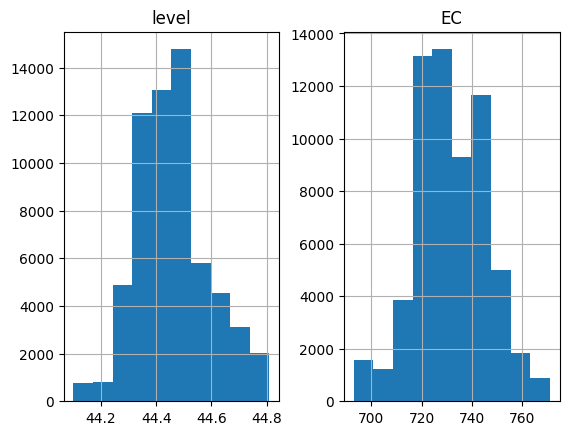

In [58]:
#히스토그램으로 데이터 분포 비교
df.hist()
plt.show()
#변수의 범위가 많이 다른 것을 고려하지 않으면 전기전도도의 산포도가 지하수위보다 크다고 오해할 수 있음.

In [59]:
#사본 생성
df1 = df.copy()
df1.head()

,level,EC
0,44.47,741
1,44.47,741
2,44.47,741
3,44.47,741
4,44.48,741


In [60]:
#표준화
df1['level_z_score'] = (df1['level'] - df1['level'].mean()) / df1['level'].std()
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std()
df1.head()

,level,EC,level_z_score,EC_z_score
0,44.47,741,0.080300,0.669989
1,44.47,741,0.080300,0.669989
2,44.47,741,0.080300,0.669989
3,44.47,741,0.080300,0.669989
4,44.48,741,0.158269,0.669989


In [62]:
df1.describe()
#level_z_score열과 EC_z_score 열의 평균은 0과 매우 가깝고, 표준편차는 1

,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,44.459701,731.698612,-4.216128e-14,-2.053440e-15
std,0.128256,13.882905,1.000000e+00,1.000000e+00
min,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,44.520000,742.000000,4.701450e-01,7.420196e-01
max,44.810000,771.000000,2.731246e+00,2.830920e+00


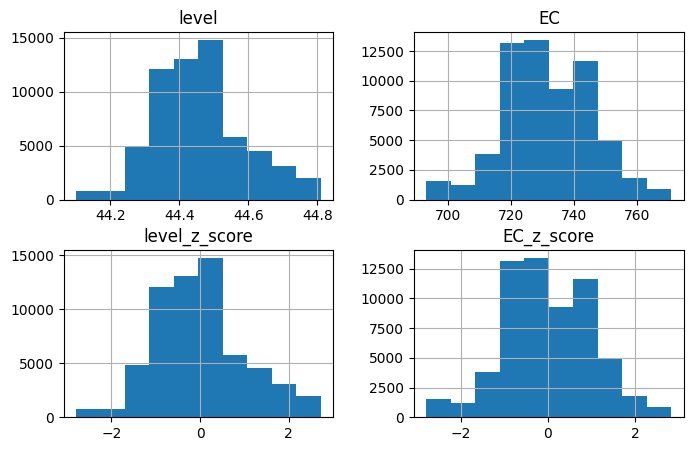

In [64]:
#표준화 후 히스토그램
df1.hist(figsize = (8,5))
plt.show()

In [68]:
#데이터프레임 이름으로 표준화
df2 = df.copy()
df2_standard = (df2- df2.mean()) / df2.std()
df2_standard.head(3)

,level,EC
0,0.0803,0.669989
1,0.0803,0.669989
2,0.0803,0.669989


In [69]:
#데이터 사본 정규화

df3 = df.copy()

df3['level_minmax'] = (df3['level'] - df3['level'].min()) / (df3['level'].max()\
                                                            -df3['level'].min())
df3['EC_minmax'] = (df3['EC'] - df3['EC'].min()) / (df3['EC'].max()\
                                                            -df3['EC'].min())
df3.head(3)

,level,EC,level_minmax,EC_minmax
0,44.47,741,0.521127,0.615385
1,44.47,741,0.521127,0.615385
2,44.47,741,0.521127,0.615385


In [70]:
#정규화 후 통계량
df3.describe()
#정규화 이후 최솟값은 0, 최대값은 1이 됨

,level,EC,level_minmax,EC_minmax
count,61814.000000,61814.000000,61814.000000,61814.000000
mean,44.459701,731.698612,0.506621,0.496136
std,0.128256,13.882905,0.180642,0.177986
min,44.100000,693.000000,0.000000,0.000000
25%,44.370000,722.000000,0.380282,0.371795
50%,44.450000,730.000000,0.492958,0.474359
75%,44.520000,742.000000,0.591549,0.628205
max,44.810000,771.000000,1.000000,1.000000


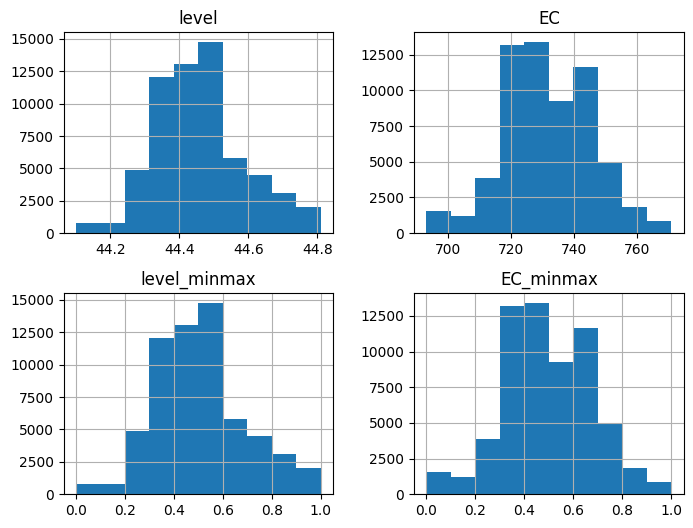

In [71]:
df3.hist(figsize = (8,6))
plt.show()

In [73]:
#타이타닉호 탑승자 데이터 전처리

import pandas as pd
import seaborn as sns

#seaborn 라이브러리의 타이타닉 데이터셋 로드 -> csv로 저장
titanic = sns.load_dataset('titanic')
titanic.to_csv('./titanic.csv', encoding = 'cp949')

In [74]:
df = pd.read_csv('./titanic.csv')
df.shape

(891, 16)

In [76]:
#각 열의 결측치 수 확인
df.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [82]:
#타이타닉 호는 초호화 유람선이라서 요금이 다른 승객들에 비해 매우 높은 승객이 있었을 것으로 예상.
#요금 열에서 이상치 개수 확인

q3_fare = df['fare'].quantile(q = 0.75)
q1_fare = df['fare'].quantile(q = 0.25)
IQR = q3_fare - q1_fare
print('하한값: ', q1_fare - 1.5 * IQR, '상한값: ', q3_fare + 1.5 * IQR)

out_lower = df[df['fare'] < (q1_fare - 1.5 * IQR)]
out_upper = df[df['fare'] > (q3_fare + 1.5 * IQR)]
out_upper
#len(out_lower), len(out_upper)
#상한값보다 큰 이상치 116개 존재

하한값:  -26.724 상한값:  65.6344


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


In [80]:
sum(out_upper['sex'] == 'male')
#성별이 남성인 승객 중 요금이 상한값보다 큰 이상치 개수 확인

46